In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("offline0721.csv")

In [3]:
MODEL_NO = ' ' #產品
Tool_ID = 'ABIEXL10' #機台
ABBR_NO = '6P' #光罩

In [4]:
fliter_6P = (df["XML_TOOL_ID"] == Tool_ID) & (df["XML_ABBR_NO"] == ABBR_NO)
df[fliter_6P]

XML_SHEET_ID XML_MODEL_NO XML_TOOL_ID XML_ABBR_NO  \
0      6P0B3504A     V15H6-Y3    ABIEXL10          6P   
15     6P0B36T0A     V15H6-Y3    ABIEXL10          6P   
16     6P0B36T04     V15H6-Y3    ABIEXL10          6P   
19     910B3761A     V15H6-Y3    ABIEXL10          6P   
24     6P0B38Q5A     V15H6-Y3    ABIEXL10          6P   
..           ...          ...         ...         ...   
809    6P0B76B74     V15H6-Y3    ABIEXL10          6P   
903    6P0B7BK2A     V15H6-Y3    ABIEXL10          6P   
904    6P0B7BK24     V15H6-Y3    ABIEXL10          6P   
907    6P0B7BZ0A     V15H6-Y3    ABIEXL10          6P   
908    6P0B7BZ04     V15H6-Y3    ABIEXL10          6P   

                        CHARTID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  \
0    B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
15   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
16   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
19   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
24   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
..                          ...            ...            ...            ...   
809  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
903  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
904  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
907  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
908  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   

     LC_DPSSPDSET3  LC_NZLSPDMENT  ...  AIRN2  VAC  LPILL  LPILR  LPILA   LPL  \
0             1.06           80.0  ...    0.7  -86   3359   3225   3328  7205   
15            1.06           80.0  ...    0.7  -87   3308   3242   3330  7219   
16            1.06           79.9  ...    0.7  -86   3308   3240   3328  7180   
19            1.06           79.9  ...    0.7  -86   3308   3228   3330  7249   
24            1.06           80.0  ...    0.7  -87   3308   3213   3330  7361   
..             ...            ...  ...    ...  ...    ...    ...    ...   ...   
809           1.06           80.0  ...    0.7  -86   3345   3276   3352  6667   
903           1.06           79.9  ...    0.7  -85   3345   3240   3352  6953   
904           1.06           80.0  ...    0.7  -86   3347   3232   3354  6970   
907           1.06           80.0  ...    0.7  -86   3345   3225   3352  7009   
908           1.06           79.9  ...    0.7  -85   3345   3232   3354  7031   

      LPR  SCANSPEED  ILLM_AVG      Y  
0    6917      175.0   4423.65  6.218  
15   7083      175.0   4423.26  6.296  
16   7109      175.0   4423.26  6.352  
19   7104      175.0   4422.50  6.260  
24   7158      179.0   4422.50  6.399  
..    ...        ...       ...    ...  
809  6692      170.0   4424.21  6.294  
903  6865      170.0   4425.48  6.274  
904  6875      170.0   4425.48  6.303  
907  6914      170.0   4425.48  6.280  
908  6938      170.0   4425.48  6.306  

[116 rows x 67 columns]

In [5]:
df_6P = df[fliter_6P].drop(df.columns[0:5], axis=1)
df_6P

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
0             17.4            2.0           1.08           1.06   
15            17.4            2.0           1.08           1.06   
16            17.4            2.0           1.08           1.06   
19            17.4            2.0           1.08           1.06   
24            17.4            2.0           1.08           1.06   
..             ...            ...            ...            ...   
809           17.4            2.0           1.08           1.06   
903           17.4            2.0           1.08           1.06   
904           17.4            2.0           1.08           1.06   
907           17.4            2.0           1.08           1.06   
908           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
0             80.0          3.1     22.7    59.0      110.1      110.1  ...   
15            80.0          3.1     22.7    59.0      110.1      110.1  ...   
16            79.9          3.1     22.7    59.0      110.1      110.1  ...   
19            79.9          3.1     22.7    59.0      110.1      110.0  ...   
24            80.0          3.1     22.8    58.0      110.1      110.1  ...   
..             ...          ...      ...     ...        ...        ...  ...   
809           80.0          3.2     22.7    58.0      110.1      110.1  ...   
903           79.9          3.2     22.8    59.0      110.1      110.1  ...   
904           80.0          3.1     22.6    59.0      110.1      110.1  ...   
907           80.0          3.2     22.8    58.0      110.1      110.0  ...   
908           79.9          3.1     22.7    59.0      110.1      110.0  ...   

     AIRN2  VAC  LPILL  LPILR  LPILA   LPL   LPR  SCANSPEED  ILLM_AVG      Y  
0      0.7  -86   3359   3225   3328  7205  6917      175.0   4423.65  6.218  
15     0.7  -87   3308   3242   3330  7219  7083      175.0   4423.26  6.296  
16     0.7  -86   3308   3240   3328  7180  7109      175.0   4423.26  6.352  
19     0.7  -86   3308   3228   3330  7249  7104      175.0   4422.50  6.260  
24     0.7  -87   3308   3213   3330  7361  7158      179.0   4422.50  6.399  
..     ...  ...    ...    ...    ...   ...   ...        ...       ...    ...  
809    0.7  -86   3345   3276   3352  6667  6692      170.0   4424.21  6.294  
903    0.7  -85   3345   3240   3352  6953  6865      170.0   4425.48  6.274  
904    0.7  -86   3347   3232   3354  6970  6875      170.0   4425.48  6.303  
907    0.7  -86   3345   3225   3352  7009  6914      170.0   4425.48  6.280  
908    0.7  -85   3345   3232   3354  7031  6938      170.0   4425.48  6.306  

[116 rows x 62 columns]

In [6]:
from sklearn.ensemble import RandomForestRegressor
y = df_6P['Y']
X = df_6P.drop(columns=['Y'])
train_6P_X, val_6P_X, train_6P_y, val_6P_y = train_test_split(X, y, random_state=1)
my_model_6P = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(train_6P_X, train_6P_y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [8]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_6P_X, train_6P_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [9]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [10]:
import shap  # package used to calculate Shap values

row_to_show = 5
data_for_prediction = val_6P_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6P)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [11]:
#基準值+各特徵的影響值=最後的預測值
#預測值是6.32 基準值是6.324 增加預測值的特徵顏色是紅色 長條面積代表數值大小 
#降低預測值的特徵顏色是藍色 可以看到增加預測值程度最大的是DV_TANKATEMP
#但可以看到SCANSPEED在這反而是降低了預測值
import matplotlib.pyplot as plt
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction,show=False,matplotlib=True).savefig('D:\\xlings_test\\test\\SHAP_6P_1.png', format = "png",dpi = 150,bbox_inches = 'tight')

In [12]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6P)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_6P_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, val_6P_X, show=False)
plt.savefig('SHAP_6P_2.png', format = "png",dpi = 150,bbox_inches = 'tight')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [13]:
shap.summary_plot(shap_values, val_6P_X, plot_type='bar', show=False)
plt.savefig('SHAP_6P_3.png', format = "png",dpi = 150,bbox_inches = 'tight')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


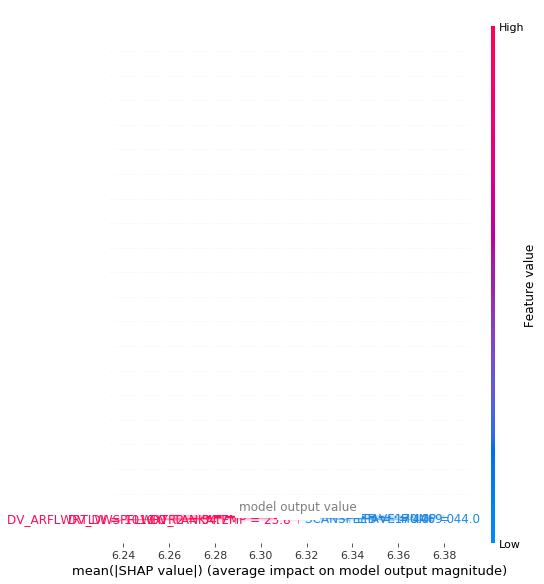

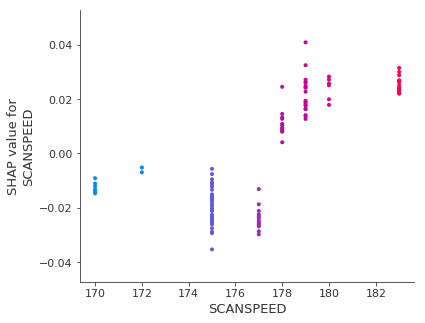

In [14]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6P)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('SCANSPEED', shap_values, X, interaction_index="SCANSPEED")

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


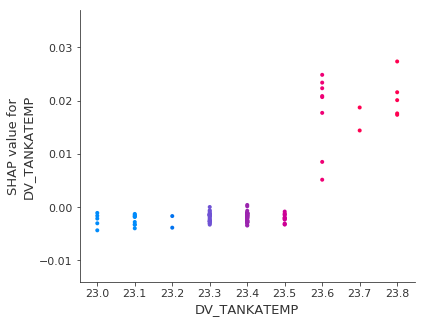

In [15]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6P)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('DV_TANKATEMP', shap_values, X, interaction_index="DV_TANKATEMP")

In [16]:
fliter_63 = (df["XML_TOOL_ID"] == 'ABIEX810') & (df["XML_ABBR_NO"] == '63')
df[fliter_63]

XML_SHEET_ID XML_MODEL_NO XML_TOOL_ID XML_ABBR_NO  \
234    640B5531A      V11X4-Y    ABIEX810          63   
235    640B55314      V11X4-Y    ABIEX810          63   
244    630B5621A      V11X4-Y    ABIEX810          63   
245    630B56214      V11X4-Y    ABIEX810          63   
248    630B55N7A      V11X4-Y    ABIEX810          63   
..           ...          ...         ...         ...   
772    630B73364      V11X4-Y    ABIEX810          63   
790    630B7453A      V11X4-Y    ABIEX810          63   
791    630B74534      V11X4-Y    ABIEX810          63   
796    630B7546A      V11X4-Y    ABIEX810          63   
797    630B75464      V11X4-Y    ABIEX810          63   

                        CHARTID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  \
234  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
235  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
244  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
245  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
248  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
..                          ...            ...            ...            ...   
772  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
790  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
791  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
796  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   
797  B11X4/PEP1/ADI/AHVA_V1_CD1           17.2            3.2           1.07   

     LC_DPSSPDSET3  LC_NZLSPDMENT  ...  AIRN2  VAC  LPILL  LPILR  LPILA   LPL  \
234           1.05           80.0  ...    0.7  -86   3154   3091   3254  7771   
235           1.05           79.9  ...    0.7  -87   3154   3105   3259  7773   
244           1.05           80.0  ...    0.7  -87   3154   3159   3257  7688   
245           1.05           80.1  ...    0.7  -87   3154   3169   3257  7749   
248           1.05           80.1  ...    0.7  -87   3154   3120   3257  7776   
..             ...            ...  ...    ...  ...    ...    ...    ...   ...   
772           1.05           80.0  ...    0.7  -87   3174   3203   3347  7175   
790           1.05           80.0  ...    0.7  -86   3174   3184   3350  7266   
791           1.05           79.9  ...    0.7  -85   3174   3176   3350  7249   
796           1.05           79.9  ...    0.7  -86   3174   3174   3350  7302   
797           1.05           80.0  ...    0.7  -86   3176   3184   3347  7212   

      LPR  SCANSPEED  ILLM_AVG      Y  
234  7578      157.0   3972.39  7.180  
235  7539      157.0   3972.39  7.183  
244  7729      157.0   3972.39  7.154  
245  7705      157.0   3972.39  7.159  
248  7629      163.0   3972.39  7.404  
..    ...        ...       ...    ...  
772  7339      159.0   3988.54  7.362  
790  7358      159.0   3989.55  7.389  
791  7263      159.0   3989.55  7.201  
796  7375      159.0   3989.55  7.368  
797  7388      159.0   3989.55  7.374  

[108 rows x 67 columns]

In [17]:
df_63 = df[fliter_63].drop(df.columns[0:5], axis=1)
df_63

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
234           17.2            3.2           1.07           1.05   
235           17.2            3.2           1.07           1.05   
244           17.2            3.2           1.07           1.05   
245           17.2            3.2           1.07           1.05   
248           17.2            3.2           1.07           1.05   
..             ...            ...            ...            ...   
772           17.2            3.2           1.07           1.05   
790           17.2            3.2           1.07           1.05   
791           17.2            3.2           1.07           1.05   
796           17.2            3.2           1.07           1.05   
797           17.2            3.2           1.07           1.05   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
234           80.0          3.0     22.7    67.0      110.1      110.1  ...   
235           79.9          3.0     22.7    67.0      110.1      110.1  ...   
244           80.0          3.0     22.7    67.0      110.1      110.1  ...   
245           80.1          3.0     22.7    67.0      110.2      110.1  ...   
248           80.1          3.0     22.7    67.0      110.1      110.1  ...   
..             ...          ...      ...     ...        ...        ...  ...   
772           80.0          3.0     22.7    67.0      110.1      110.1  ...   
790           80.0          3.0     22.7    67.0      110.0      110.1  ...   
791           79.9          3.0     22.7    67.0      110.0      110.1  ...   
796           79.9          3.0     22.7    67.0      110.1      110.1  ...   
797           80.0          3.0     22.7    67.0      110.1      110.1  ...   

     AIRN2  VAC  LPILL  LPILR  LPILA   LPL   LPR  SCANSPEED  ILLM_AVG      Y  
234    0.7  -86   3154   3091   3254  7771  7578      157.0   3972.39  7.180  
235    0.7  -87   3154   3105   3259  7773  7539      157.0   3972.39  7.183  
244    0.7  -87   3154   3159   3257  7688  7729      157.0   3972.39  7.154  
245    0.7  -87   3154   3169   3257  7749  7705      157.0   3972.39  7.159  
248    0.7  -87   3154   3120   3257  7776  7629      163.0   3972.39  7.404  
..     ...  ...    ...    ...    ...   ...   ...        ...       ...    ...  
772    0.7  -87   3174   3203   3347  7175  7339      159.0   3988.54  7.362  
790    0.7  -86   3174   3184   3350  7266  7358      159.0   3989.55  7.389  
791    0.7  -85   3174   3176   3350  7249  7263      159.0   3989.55  7.201  
796    0.7  -86   3174   3174   3350  7302  7375      159.0   3989.55  7.368  
797    0.7  -86   3176   3184   3347  7212  7388      159.0   3989.55  7.374  

[108 rows x 62 columns]

In [18]:
y = df_63['Y']
X = df_63.drop(columns=['Y'])
train_63_X, val_63_X, train_63_y, val_63_y = train_test_split(X, y, random_state=1)
my_model_63 = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(train_63_X, train_63_y)

In [19]:
row_to_show = 5
data_for_prediction = val_63_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_63)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [23]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

IndexError: too many indices for array

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


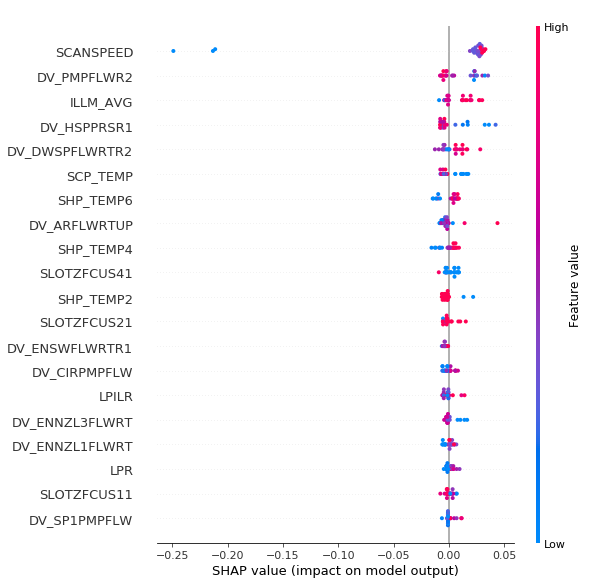

In [21]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_63)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_63_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, val_63_X)

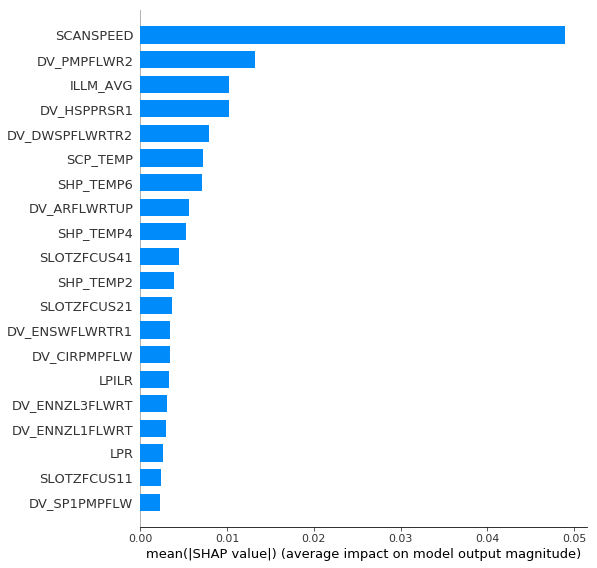

In [22]:
shap.summary_plot(shap_values, val_63_X, plot_type='bar')

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_63)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('SCANSPEED', shap_values, X, interaction_index="SCANSPEED")

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_63)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('DV_ARFLWRTUP', shap_values, X, interaction_index="DV_ARFLWRTUP")

In [ ]:
fliter_6R = (df["XML_TOOL_ID"] == 'ABIEXL10') & (df["XML_ABBR_NO"] == '6R')
df[fliter_6R]

In [ ]:
df_6R = df[fliter_6R].drop(df.columns[0:5], axis=1)
df_6R

In [ ]:
y = df_6R['Y']
X = df_6R.drop(columns=['Y'])
train_6R_X, val_6R_X, train_6R_y, val_6R_y = train_test_split(X, y, random_state=1)
my_model_6R = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(train_6R_X, train_6R_y)

In [ ]:
row_to_show = 5
data_for_prediction = val_6R_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6R)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6R)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_6R_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, val_6R_X)

In [ ]:
shap.summary_plot(shap_values, val_6R_X, plot_type='bar')

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_6R)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('SCANSPEED', shap_values, X, interaction_index="SCANSPEED")

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model_63)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('DV_TANKATEMP', shap_values, X, interaction_index="DV_TANKATEMP")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
cols = ['SCANSPEED', 'Y']
sns.pairplot(df_6R[cols], size = 2.5)
plt.show();